EXPERIMENT 8: SUPPORT VECTOR MACHINES (SVMs) AND THE KERNEL TRICK

TASK 1: DATA LOADING AND PREPROCESSING

✓ Generated make_moons dataset:
  - Total samples: 500
  - Features: 2
  - Classes: 2

✓ Train-Validation Split:
  - Training set: 350 samples (70%)
  - Validation set: 150 samples (30%)

✓ Feature Standardization:
  - Fitted on training set
  - Transformed both training and validation sets
  - Training set mean: [2.49245069e-16 2.93416085e-18]
  - Training set std: [1. 1.]

TASK 2: MODEL 1 - LINEAR SVM (The Failing Case)

✓ Linear SVM Results:
  - Validation Accuracy: 0.8533

  Classification Report:
              precision    recall  f1-score   support

     Class 0       0.84      0.87      0.86        75
     Class 1       0.86      0.84      0.85        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150

  Analysis:
  - Linear SVM cannot fit circular/curved decis

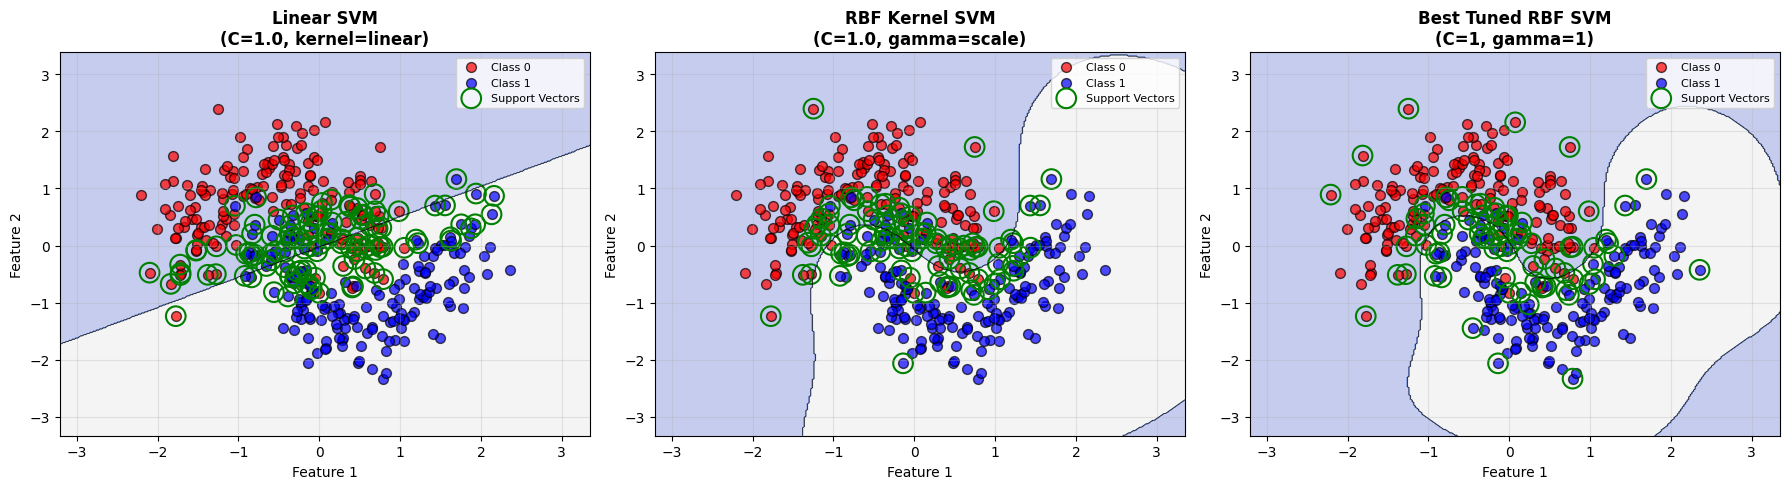


✓ Decision boundaries visualization saved as 'decision_boundaries.png'


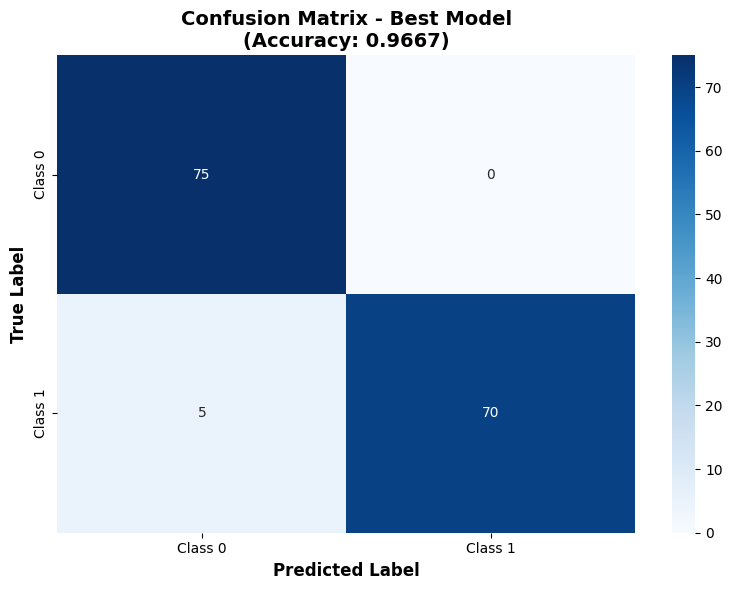


✓ Confusion matrix visualization saved as 'confusion_matrix.png'

HYPERPARAMETER ANALYSIS

✓ Top 10 Parameter Combinations (by Cross-Validation Accuracy):
    C  gamma  Mean Accuracy  Std Dev
  1.0    1.0       0.951429 0.026496
  1.0   10.0       0.945714 0.024578
100.0    0.1       0.942857 0.023905
  0.1   10.0       0.937143 0.021381
 10.0    1.0       0.937143 0.019378
100.0    1.0       0.931429 0.027701
  0.1    1.0       0.928571 0.020203
 10.0   10.0       0.925714 0.020996
100.0   10.0       0.914286 0.012778
 10.0    0.1       0.894286 0.026496

FINAL SUMMARY & CONCLUSIONS

✓ EXPERIMENT COMPLETE!

KEY FINDINGS:
─────────────

1. LINEAR SVM FAILURE:
   - Accuracy: 0.8533
   - The linear SVM creates a straight decision boundary that cannot
     separate the curved moons dataset effectively.
   - Reason: The data is non-linearly separable.

2. KERNEL TRICK SUCCESS:
   - RBF Kernel Accuracy: 0.9467
   - Polynomial Kernel Accuracy: 0.8733
   - The kernel trick maps data to highe

In [2]:
# ==========================================
# EXPERIMENT 8: SVMs AND THE KERNEL TRICK
# Complete Implementation for Google Colab
# ==========================================

# Install necessary libraries
!pip install numpy pandas scikit-learn matplotlib seaborn -q

# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("EXPERIMENT 8: SUPPORT VECTOR MACHINES (SVMs) AND THE KERNEL TRICK")
print("=" * 80)

# ==========================================
# TASK 1: DATA LOADING AND PREPROCESSING
# ==========================================
print("\n" + "=" * 80)
print("TASK 1: DATA LOADING AND PREPROCESSING")
print("=" * 80)

# Generate the moons dataset
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)
print(f"\n✓ Generated make_moons dataset:")
print(f"  - Total samples: {X.shape[0]}")
print(f"  - Features: {X.shape[1]}")
print(f"  - Classes: {len(np.unique(y))}")

# Create 70/30 train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print(f"\n✓ Train-Validation Split:")
print(f"  - Training set: {X_train.shape[0]} samples (70%)")
print(f"  - Validation set: {X_val.shape[0]} samples (30%)")

# Standardize features (critical for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
print(f"\n✓ Feature Standardization:")
print(f"  - Fitted on training set")
print(f"  - Transformed both training and validation sets")
print(f"  - Training set mean: {X_train_scaled.mean(axis=0)}")
print(f"  - Training set std: {X_train_scaled.std(axis=0)}")

# ==========================================
# TASK 2: MODEL 1 - LINEAR SVM
# ==========================================
print("\n" + "=" * 80)
print("TASK 2: MODEL 1 - LINEAR SVM (The Failing Case)")
print("=" * 80)

linear_model = SVC(kernel='linear', C=1.0, random_state=42)
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_val_scaled)

linear_accuracy = accuracy_score(y_val, y_pred_linear)
print(f"\n✓ Linear SVM Results:")
print(f"  - Validation Accuracy: {linear_accuracy:.4f}")
print(f"\n  Classification Report:")
print(classification_report(y_val, y_pred_linear, target_names=['Class 0', 'Class 1']))

# Analysis
print(f"  Analysis:")
print(f"  - Linear SVM cannot fit circular/curved decision boundaries.")
print(f"  - The 'moons' dataset is non-linearly separable, so linear SVM fails.")
print(f"  - C parameter controls the trade-off between margin and misclassification.")
print(f"  - A very small C (e.g., 0.01) allows more misclassifications to maximize margin.")

# ==========================================
# TASK 3: MODEL 2 & 3 - KERNEL TRICK
# ==========================================
print("\n" + "=" * 80)
print("TASK 3: MODEL 2 & 3 - KERNEL TRICK (RBF and Polynomial)")
print("=" * 80)

# RBF Kernel Model
rbf_model = SVC(kernel='rbf', random_state=42)
rbf_model.fit(X_train_scaled, y_train)
y_pred_rbf = rbf_model.predict(X_val_scaled)

rbf_accuracy = accuracy_score(y_val, y_pred_rbf)
print(f"\n✓ RBF Kernel SVM Results:")
print(f"  - Validation Accuracy: {rbf_accuracy:.4f}")
print(f"\n  Classification Report:")
print(classification_report(y_val, y_pred_rbf, target_names=['Class 0', 'Class 1']))

# Polynomial Kernel Model
poly_model = SVC(kernel='poly', degree=3, random_state=42)
poly_model.fit(X_train_scaled, y_train)
y_pred_poly = poly_model.predict(X_val_scaled)

poly_accuracy = accuracy_score(y_val, y_pred_poly)
print(f"\n✓ Polynomial Kernel SVM Results:")
print(f"  - Validation Accuracy: {poly_accuracy:.4f}")
print(f"\n  Classification Report:")
print(classification_report(y_val, y_pred_poly, target_names=['Class 0', 'Class 1']))

# Model Comparison Table
print(f"\n" + "=" * 80)
print("MODEL COMPARISON TABLE (Task 3)")
print("=" * 80)

comparison_df = pd.DataFrame({
    'Model': ['Linear SVM', 'RBF Kernel SVM', 'Polynomial Kernel SVM'],
    'Validation Accuracy': [linear_accuracy, rbf_accuracy, poly_accuracy],
    'Precision': [
        precision_score(y_val, y_pred_linear),
        precision_score(y_val, y_pred_rbf),
        precision_score(y_val, y_pred_poly)
    ],
    'Recall': [
        recall_score(y_val, y_pred_linear),
        recall_score(y_val, y_pred_rbf),
        recall_score(y_val, y_pred_poly)
    ],
    'F1-Score': [
        f1_score(y_val, y_pred_linear),
        f1_score(y_val, y_pred_rbf),
        f1_score(y_val, y_pred_poly)
    ]
})

print("\n" + comparison_df.to_string(index=False))
print(f"\n✓ Best Model (Default Params): RBF Kernel SVM (Accuracy: {rbf_accuracy:.4f})")
print(f"  Reason: The moons dataset has a curved, circular decision boundary.")
print(f"  The RBF kernel can capture this non-linearity using radial basis functions.")

# ==========================================
# TASK 4: HYPERPARAMETER TUNING WITH GRIDSEARCHCV
# ==========================================
print("\n" + "=" * 80)
print("TASK 4: HYPERPARAMETER TUNING WITH GRIDSEARCHCV")
print("=" * 80)

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['rbf']
}

print(f"\n✓ Parameter Grid:")
print(f"  - C: {param_grid['C']}")
print(f"  - gamma: {param_grid['gamma']}")
print(f"  - kernel: {param_grid['kernel']}")

# Setup GridSearchCV
grid = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    refit=True,
    verbose=1,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print(f"\n✓ Running GridSearchCV with 5-fold cross-validation...")
grid.fit(X_train_scaled, y_train)

print(f"\n✓ GridSearchCV Complete!")
print(f"  - Best Parameters: {grid.best_params_}")
print(f"  - Best Cross-Validated Accuracy: {grid.best_score_:.4f}")
print(f"  - Total combinations tested: {len(grid.cv_results_['params'])}")

# ==========================================
# TASK 5: FINAL EVALUATION AND VISUALIZATION
# ==========================================
print("\n" + "=" * 80)
print("TASK 5: FINAL EVALUATION AND VISUALIZATION")
print("=" * 80)

# Final predictions using best model
final_predictions = grid.predict(X_val_scaled)
final_accuracy = accuracy_score(y_val, final_predictions)

print(f"\n✓ Final Best Model Performance on Hold-Out Validation Set:")
print(f"  - Accuracy: {final_accuracy:.4f}")
print(f"\n  Classification Report:")
print(classification_report(y_val, final_predictions, target_names=['Class 0', 'Class 1']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, final_predictions)
print(f"\n✓ Confusion Matrix:")
print(conf_matrix)

# ==========================================
# VISUALIZATION: DECISION BOUNDARIES
# ==========================================

def plot_decision_boundary(model, X, y, ax, title, X_scaler=None):
    """
    Plot decision boundary for a given model.

    Parameters:
    -----------
    model : Fitted SVM model
    X : Training data (scaled)
    y : Training labels
    ax : Matplotlib axis
    title : Title for the plot
    X_scaler : Scaler object (if needed for mesh transformation)
    """
    # Create mesh
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    # Predict on mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm', levels=np.arange(0, 2, 0.1))
    ax.contour(xx, yy, Z, colors='black', linewidths=0.5, levels=[0.5])

    # Plot data points
    scatter = ax.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Class 0',
                        edgecolors='k', s=50, alpha=0.7)
    ax.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Class 1',
              edgecolors='k', s=50, alpha=0.7)

    # Plot support vectors (if available)
    if hasattr(model, 'support_vectors_'):
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                  s=200, linewidth=1.5, facecolors='none', edgecolors='green',
                  label='Support Vectors')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 1', fontsize=10)
    ax.set_ylabel('Feature 2', fontsize=10)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=8)
    ax.grid(True, alpha=0.3)

# Create figure with 1x3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_decision_boundary(linear_model, X_train_scaled, y_train, axes[0],
                      'Linear SVM\n(C=1.0, kernel=linear)')
plot_decision_boundary(rbf_model, X_train_scaled, y_train, axes[1],
                      'RBF Kernel SVM\n(C=1.0, gamma=scale)')
plot_decision_boundary(grid.best_estimator_, X_train_scaled, y_train, axes[2],
                      f'Best Tuned RBF SVM\n(C={grid.best_params_["C"]}, gamma={grid.best_params_["gamma"]})')

plt.tight_layout()
plt.savefig('decision_boundaries.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Decision boundaries visualization saved as 'decision_boundaries.png'")

# ==========================================
# CONFUSION MATRIX VISUALIZATION
# ==========================================

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax.set_title(f'Confusion Matrix - Best Model\n(Accuracy: {final_accuracy:.4f})',
            fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Confusion matrix visualization saved as 'confusion_matrix.png'")

# ==========================================
# HYPERPARAMETER ANALYSIS
# ==========================================
print("\n" + "=" * 80)
print("HYPERPARAMETER ANALYSIS")
print("=" * 80)

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(grid.cv_results_)
results_df = results_df[['param_C', 'param_gamma', 'mean_test_score', 'std_test_score']]
results_df.columns = ['C', 'gamma', 'Mean Accuracy', 'Std Dev']
results_df = results_df.sort_values('Mean Accuracy', ascending=False)

print(f"\n✓ Top 10 Parameter Combinations (by Cross-Validation Accuracy):")
print(results_df.head(10).to_string(index=False))

# ==========================================
# FINAL SUMMARY
# ==========================================
print("\n" + "=" * 80)
print("FINAL SUMMARY & CONCLUSIONS")
print("=" * 80)

print(f"""
✓ EXPERIMENT COMPLETE!

KEY FINDINGS:
─────────────

1. LINEAR SVM FAILURE:
   - Accuracy: {linear_accuracy:.4f}
   - The linear SVM creates a straight decision boundary that cannot
     separate the curved moons dataset effectively.
   - Reason: The data is non-linearly separable.

2. KERNEL TRICK SUCCESS:
   - RBF Kernel Accuracy: {rbf_accuracy:.4f}
   - Polynomial Kernel Accuracy: {poly_accuracy:.4f}
   - The kernel trick maps data to higher-dimensional space where
     a linear separator becomes feasible without explicit computation.

3. HYPERPARAMETER TUNING:
   - Best C: {grid.best_params_['C']}
   - Best gamma: {grid.best_params_['gamma']}
   - Best Cross-Validated Accuracy: {grid.best_score_:.4f}
   - Final Validation Accuracy: {final_accuracy:.4f}

4. IMPACT OF HYPERPARAMETERS:
   - C (Regularization): Controls trade-off between margin and misclassification.
     * Small C: Allows more misclassifications (softer margin)
     * Large C: Minimizes misclassifications (harder margin)

   - Gamma (Kernel Influence): Controls influence of each training example.
     * Small gamma: Far-reaching influence (smooth boundary)
     * Large gamma: Close influence only (complex, wiggly boundary)

5. SUPPORT VECTORS:
   - Number of support vectors in best model: {len(grid.best_estimator_.support_vectors_)}
   - These are the most critical training examples that define the boundary.

VISUALIZATIONS CREATED:
─────────────────────
1. decision_boundaries.png - Shows decision boundaries for all 3 models
2. confusion_matrix.png - Shows final model's confusion matrix

FILES TO SUBMIT:
────────────────
1. This notebook with all code and outputs
2. StudentID_Report.pdf with:
   - Model comparison table
   - Decision boundary plots
   - Classification report & confusion matrix
   - Answers to conclusion questions
""")

print("=" * 80)
print("END OF EXPERIMENT 8")
print("=" * 80)
